In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Medical Price Dataset.csv to Medical Price Dataset.csv


In [21]:
medical_data = pd.read_csv("Medical Price Dataset.csv")

In [22]:
medical_data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [23]:
medical_data["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [24]:
medical_data["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [25]:
medical_data["bmi"].describe()

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

In [26]:
medical_data["age"].min()

18

In [27]:
## Normalizing age and bmi between 0 and 1
medical_data["bmi"] = (medical_data["bmi"]-medical_data["bmi"].min())/(medical_data["bmi"].max()-medical_data["bmi"].min())
medical_data["age"] = (medical_data["age"]-medical_data["age"].min())/(medical_data["age"].max()-medical_data["age"].min())

In [28]:
medical_data

,age,sex,bmi,children,smoker,region,charges
0,0.021739,female,0.321227,0,yes,southwest,16884.92400
1,0.000000,male,0.479150,1,no,southeast,1725.55230
2,0.217391,male,0.458434,3,no,southeast,4449.46200
3,0.326087,male,0.181464,0,no,northwest,21984.47061
4,0.304348,male,0.347592,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,0.695652,male,0.403820,3,no,northwest,10600.54830
1334,0.000000,female,0.429379,0,no,northeast,2205.98080
1335,0.000000,female,0.562012,0,no,southeast,1629.83350
1336,0.065217,female,0.264730,0,no,southwest,2007.94500


In [42]:
## Removing discrete variables which will not participate in the linear regression
medical_data = medical_data.drop(["sex", "smoker", "region"],axis = 1)

In [29]:
# Normaling children varible between 0 and 1
medical_data["children"] = (medical_data["children"]-medical_data["children"].min())/(medical_data["children"].max()-medical_data["children"].min())

In [43]:
medical_data

,age,bmi,children,charges
0,0.021739,0.321227,0.0,16884.92400
1,0.000000,0.479150,0.2,1725.55230
2,0.217391,0.458434,0.6,4449.46200
3,0.326087,0.181464,0.0,21984.47061
4,0.304348,0.347592,0.0,3866.85520
...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830
1334,0.000000,0.429379,0.0,2205.98080
1335,0.000000,0.562012,0.0,1629.83350
1336,0.065217,0.264730,0.0,2007.94500


In [44]:
train_data = medical_data[:937]
test_data = medical_data[937:1338]

In [45]:
train_data

,age,bmi,children,charges
0,0.021739,0.321227,0.0,16884.92400
1,0.000000,0.479150,0.2,1725.55230
2,0.217391,0.458434,0.6,4449.46200
3,0.326087,0.181464,0.0,21984.47061
4,0.304348,0.347592,0.0,3866.85520
...,...,...,...,...
932,0.608696,0.264730,1.0,10096.97000
933,0.586957,0.520312,0.0,7348.14200
934,0.304348,0.570891,0.4,4673.39220
935,0.891304,0.310465,0.0,12233.82800


In [46]:
test_data

,age,bmi,children,charges
937,0.456522,0.222357,1.0,8965.79575
938,0.000000,0.274953,0.4,2304.00220
939,0.760870,0.363734,0.0,9487.64420
940,0.000000,0.195050,0.0,1121.87390
941,0.695652,0.810600,0.2,9549.56510
...,...,...,...,...
1333,0.695652,0.403820,0.6,10600.54830
1334,0.000000,0.429379,0.0,2205.98080
1335,0.000000,0.562012,0.0,1629.83350
1336,0.065217,0.264730,0.0,2007.94500


In [47]:
x_train = np.array(train_data.drop(["charges"], axis = 1))
y_train = train_data["charges"]

In [48]:
x_train

array([[0.02173913, 0.3212268 , 0.        ],
       [0.        , 0.47914985, 0.2       ],
       [0.2173913 , 0.45843422, 0.6       ],
       ...,
       [0.30434783, 0.5708905 , 0.4       ],
       [0.89130435, 0.31046543, 0.        ],
       [0.56521739, 0.37059457, 0.4       ]])

In [49]:
y_train

0      16884.92400
1       1725.55230
2       4449.46200
3      21984.47061
4       3866.85520
          ...     
932    10096.97000
933     7348.14200
934     4673.39220
935    12233.82800
936    32108.66282
Name: charges, Length: 937, dtype: float64

In [50]:
x_test = np.array(test_data.drop(["charges"], axis = 1))
y_test = test_data["charges"]

In [51]:
x_test

array([[0.45652174, 0.22235674, 1.        ],
       [0.        , 0.27495292, 0.4       ],
       [0.76086957, 0.36373419, 0.        ],
       ...,
       [0.        , 0.56201238, 0.        ],
       [0.06521739, 0.26472962, 0.        ],
       [0.93478261, 0.35270379, 0.        ]])

In [52]:
y_test

937      8965.79575
938      2304.00220
939      9487.64420
940      1121.87390
941      9549.56510
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 401, dtype: float64

In [54]:
def cost_function(X, y, w, b):
    """
    Parameters:
    X: features
    y: target values
    w: weights
    b: bias
    
    Returns:
    cost: cost with current weights and bias
    """
    cost = np.sum((((X.dot(w) + b) - y) ** 2) / (2*len(y)))
    return cost

In [55]:
def gradient_descent_function(X, y, w, b, alpha=0.01, epochs=1000):
    """
    Parameters:
    X: features
    y: target values
    w: initial weights
    b: initial bias
    alpha: learning rate
    epochs: number of iterations
    
    Returns:
    costs: cost per epoch
    w: finalised weights
    b: finalised bias
    """
    m = len(y)
    costs = [0] * epochs
    
    for epoch in range(epochs):
        # Calculate the value -- Forward Propagation
        z = X.dot(w) + b
        
        # Calculate the losses
        loss = z - y
        
        # Calculate gradient descent
        weight_gradient = X.T.dot(loss) / m
        bias_gradient = np.sum(loss) / m
        
        # Update weights and bias
        w = w - alpha*weight_gradient
        b = b - alpha*bias_gradient
        
        # Store current lost
        cost = cost_function(X, y, w, b)
        costs[epoch] = cost
        
    return w, b, costs

In [67]:
# Initial random weights
w = np.random.randn(x_train.shape[1])
# Initial bias
b = 0
weights, bias, costs = gradient_descent_function(x_train, y_train, w, b, epochs=25000);

In [68]:
print(weights)
print(bias)
print(costs)

[11910.56969911 11598.93991482  1772.93670605]
2462.0658175731883
[156057094.14711887, 153472218.33215404, 150961790.87918875, 148523664.1538118, 146155752.48005152, 143856030.3528903, 141622530.70234817, 139453343.20764655, 137346612.66000837, 135300537.37269104, 133313367.63688916, 131383404.22218448, 129508996.92025732, 127688543.13061155, 125920486.48710111, 124203315.52408078, 122535562.38103852, 120915801.54459819, 119342648.62681593, 117814759.17872187, 116330827.5380911, 114889585.71045598, 113489802.28240126, 112130281.36621003, 110809861.57495663, 109527415.02716774, 108281846.38019876, 107072091.8914972, 105897118.50694808, 104755922.97552064, 103647530.9894571, 102570996.34926689, 101525400.1528104, 100509850.0077776, 99523479.26688659, 98565446.28514606, 97634933.69854602, 96731147.72355781, 95853317.47684355, 95000694.31459156, 94172551.19091213, 93368182.03474307, 92586901.14473167, 91828042.60157394, 91090959.69730788, 90375024.38107133, 89679626.72084983, 89004174.3807

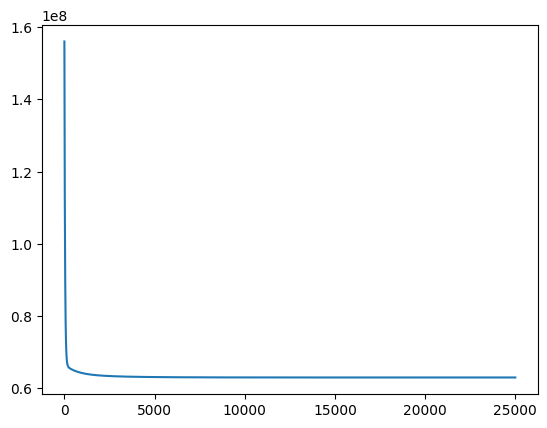

In [69]:
# plotting the cost function
plt.plot(costs)
plt.show()

In [62]:
# Evaluating the model
def predict(X, w, b):
  return X.dot(w) + b

def r2score(y_pred, y):
  tss = np.sum((y-y.mean())**2)
  rss = np.sum((y_pred-y)**2)
  r2 = 1 - (rss/tss)
  return r2

In [70]:
# predicted values with our model
y_pred = predict(x_test, weights, bias)

In [71]:
r2 = r2score(y_pred, y_test)

In [72]:
print(r2)

0.08980248599656138


In [73]:
# printing final loss obtained on test data
print(np.sum((y_pred-y_test)**2)/2*len(y_test))

10990307843407.541
